INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/chromatica_dsa.yaml
INFO: Loading telescope configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/../telescopes/dsa.yaml
INFO: Configurations successfully loaded and merged.
INFO: --- Starting Scintillation Pipeline for chromatica ---
INFO: Noise modelling disabled by config.
INFO: Loading and processing raw data...
INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/chromatica.npz
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Applying RFI masking.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Loaded Configuration ---
{
  "telescope_name": "DSA-110",
  "instrument_type": "Multi-Dish Interferometer",
  "native_channel_width_mhz": 0.03051757812,
  "total_bandwidth_mhz": 187.5,
  "num_channels": 6144,
  "min_freq_mhz": 1311.25,
  "max_freq_mhz": 1498.75,
  "burst_id": "chromatica",
  "input_data_path": "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/chromatica.npz",
  "telescope": "dsa",
  "analysis": {
    "rfi_masking": {
      "find_burst_thres": 5.0,
      "padding_factor": 0.0,
      "use_symmetric_noise_window": true,
      "rfi_downsample_factor": 16,
      "enable_time_domain_flagging": false,
      "time_threshold_sigma": 7.0,
      "freq_threshold_sigma": 5.0
    },
    "acf": {
      "num_subbands": 2,
      "max_lag_mhz": 45.0,
      "use_snr_subbanding": false,
      "enable_intra_pulse_analysis": true,
      "intra_pulse_time_bins": 5

INFO: Using time downsampling factor of 16 for RFI statistical checks.
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1271.
INFO: Using symmetric noise window of duration 23 bins.
INFO: Using downsampled noise statistics from bins 76 to 78.
Iterative RFI Masking in Frequency Domain:  20%|██        | 1/5 [00:00<00:00, 96.70it/s]
INFO: Masked 4 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Applying polynomial baseline subtraction...
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1271.
INFO: Performing order-1 polynomial baseline subtraction using off-pulse spectrum.
INFO: Baseline subtraction complete.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
IN

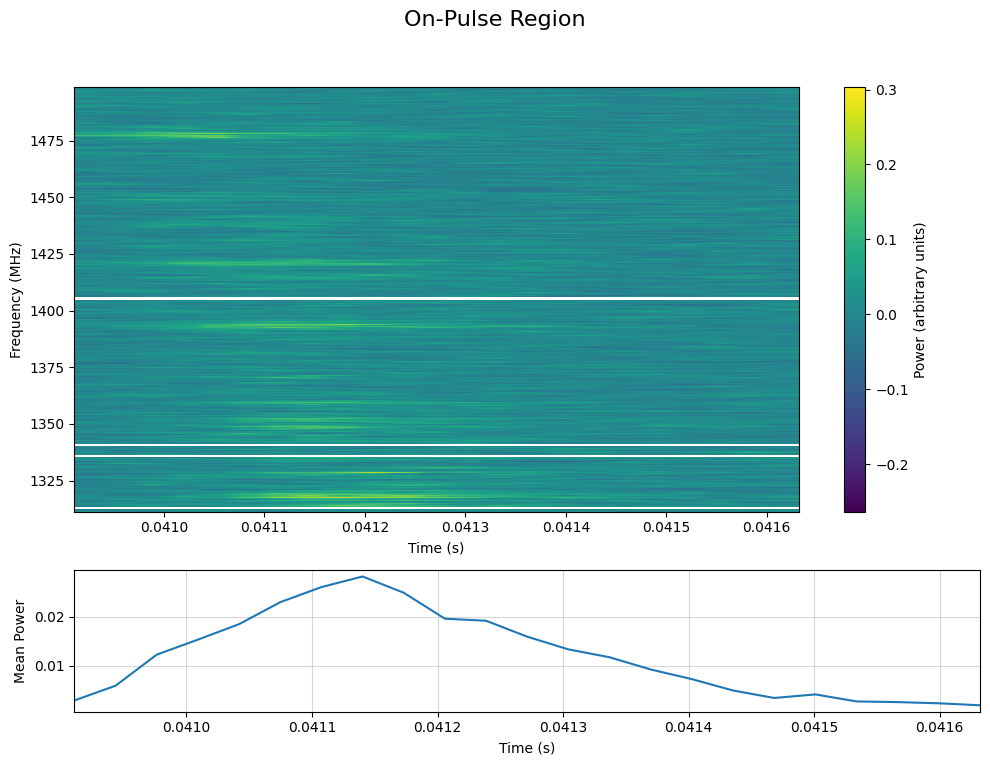

INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 1048)
INFO: Generating diagnostic plot: Off-Pulse (Noise) Region
INFO: Diagnostic plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/chromatica_off_pulse_diagnostic.png


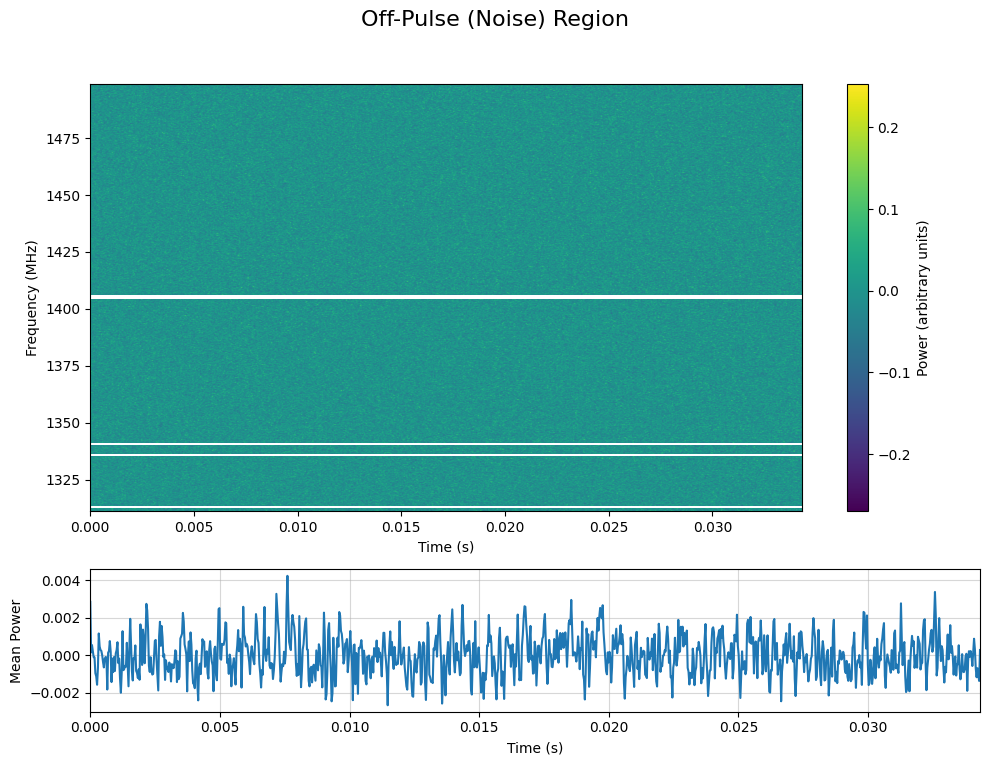

INFO: On/Off pulse diagnostic plots saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics
INFO: Generating baseline fit diagnostic plot.
INFO: Generating baseline fit diagnostic plot.
INFO: Baseline diagnostic plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/chromatica_baseline_diagnostic.png


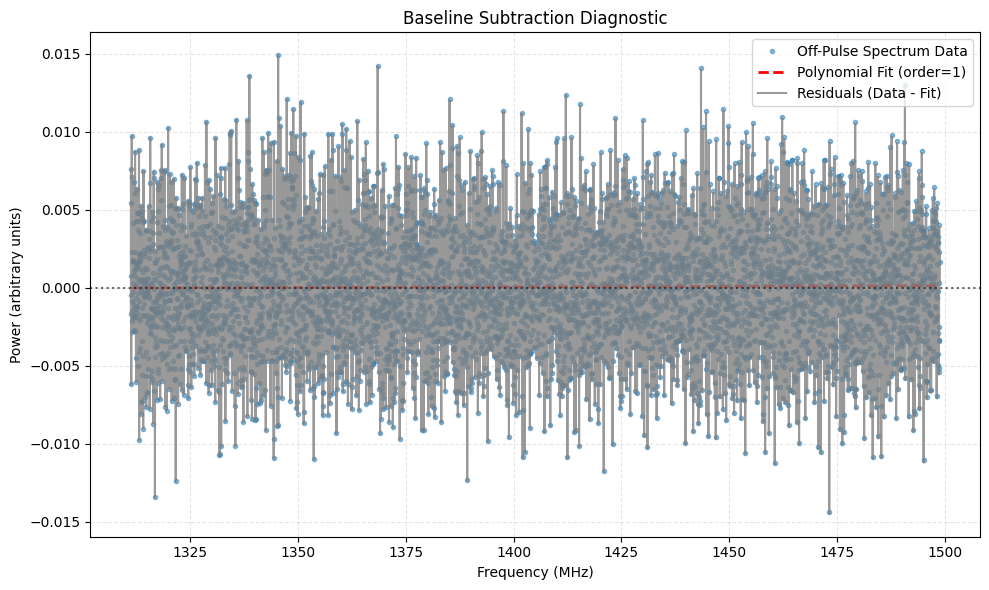

INFO: Characterizing off-pulse noise...
/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/scint_analysis/noise.py:145: UserWarning: NaNs detected – in‑painting with row/col medians.
  warnings.warn("NaNs detected – in‑painting with row/col medians.")
/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
INFO: Noise characterization complete. Detected kind: 'flux_shiftedgamma'
INFO: Calculating ACFs for all sub-bands...
INFO: Starting sub‑band ACF calculations (self‑noise + synthetic‑noise aware).
ACF per sub‑band: 100%|██████████| 2/2 [00:00<00:00, 18.41it/s]
INFO: Running intra-pulse analysis...
INFO: Starting intra-pulse scintillation analysis...
Analyzing ACF vs. Time:   0%|          | 0/5 [00:00<?, ?it/s]/opt/pysetup/.venv/lib/python3.8/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects wit

--- Pipeline Execution Finished ---

--- Saving results to ./chromatica_analysis_results.json ---

--- Generating Intra-Pulse Evolution Plot ---


INFO: Intra-pulse evolution plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/diagnostics/chromatica_intra_pulse_evolution.png


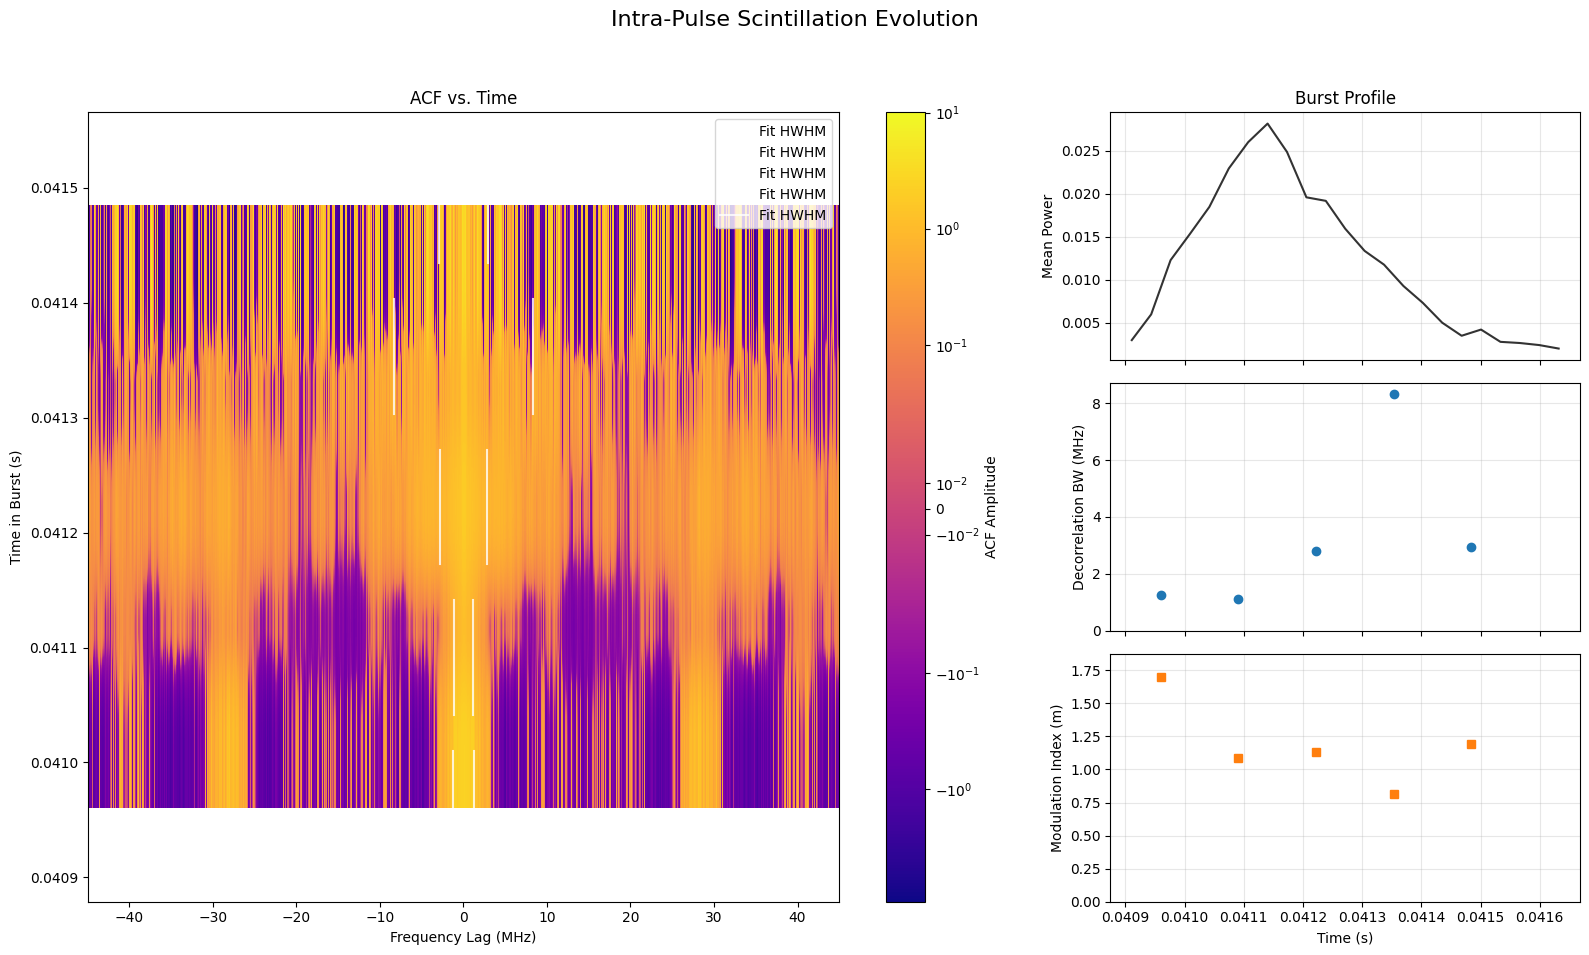

INFO: Generating full analysis overview plot.



--- Generating Final Analysis Plot ---
Saved plots to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/chromatica_analysis_overview.png


/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/scint_analysis/plotting.py:362: RuntimeWarning: overflow encountered in power
  
INFO: Analysis overview plot saved to: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/plots/chromatica_analysis_overview.png


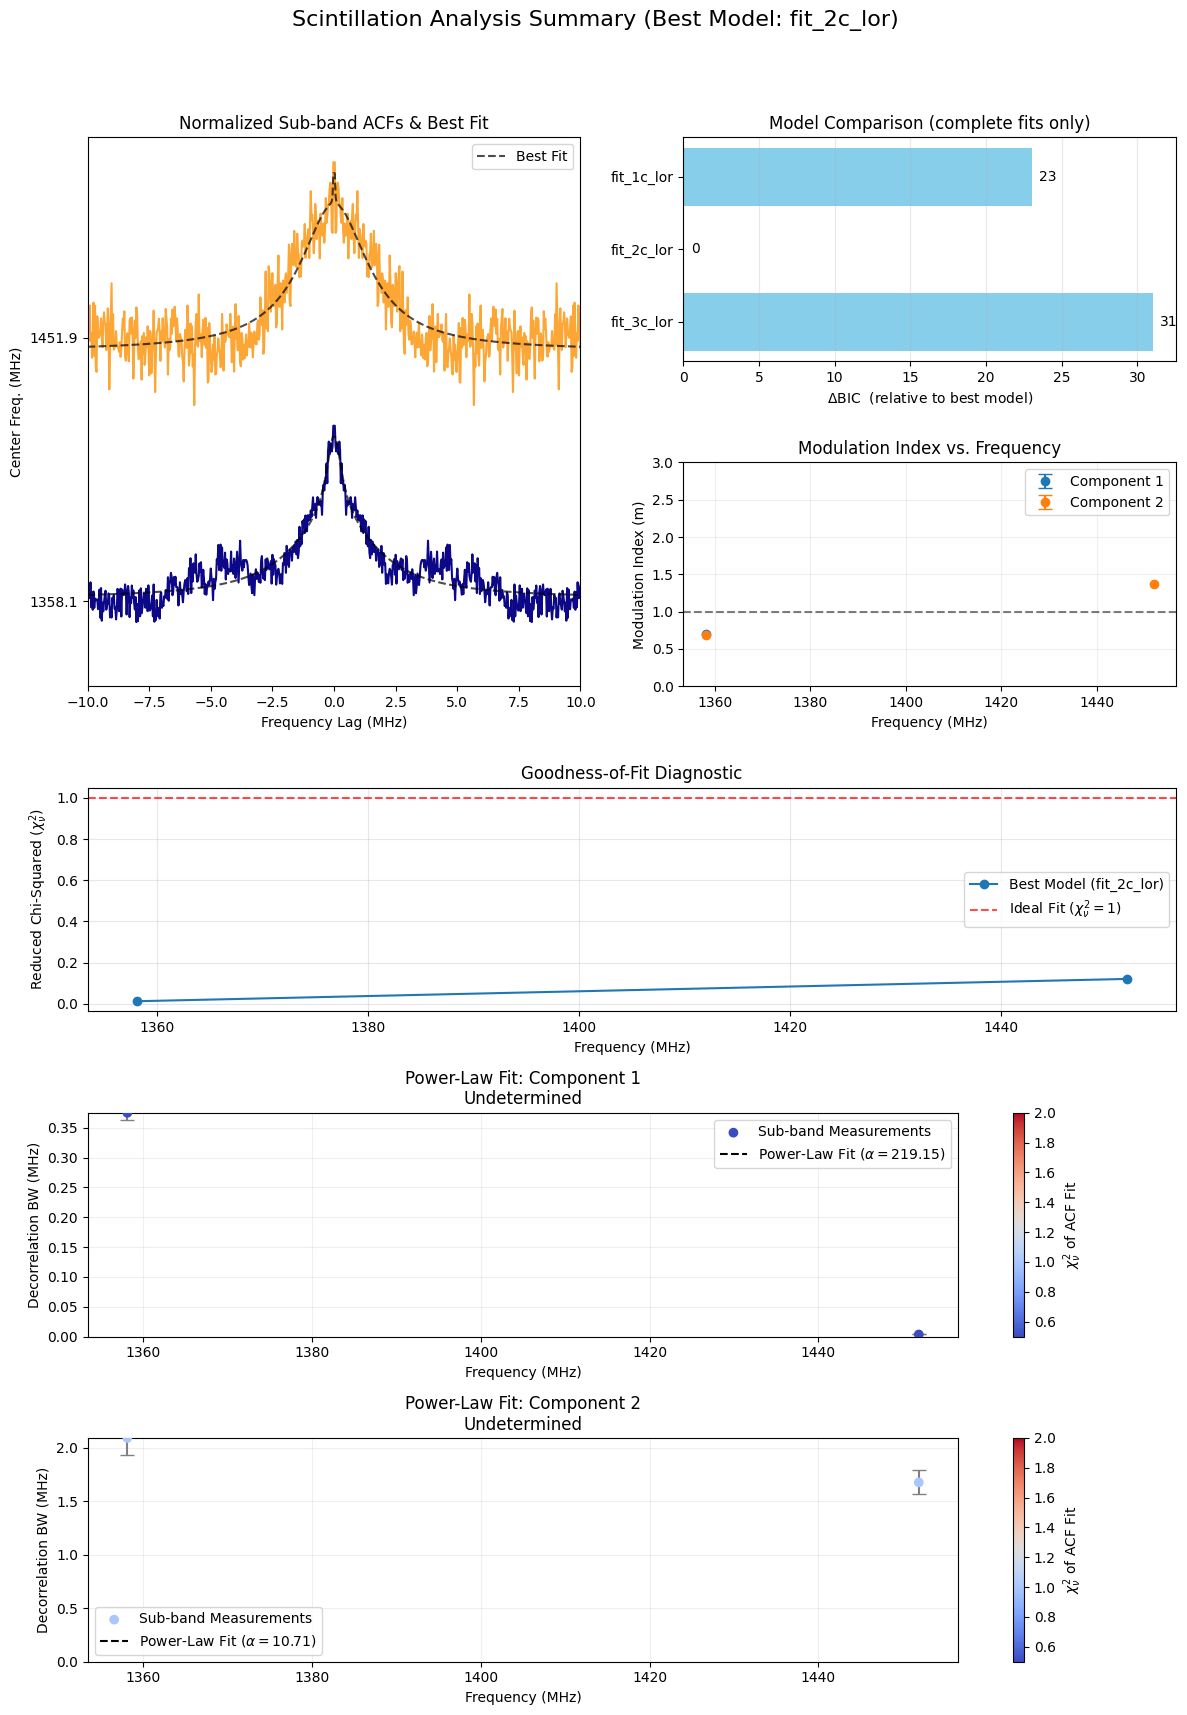

In [24]:
# Set path for module imports
import sys
# replace the path below with the absolute path to your `scattering/` folder
pkg_root = "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation"
sys.path.insert(0, pkg_root)

%load_ext autoreload
%autoreload 2

import json
import logging
import numpy as np
import matplotlib.pyplot as plt


# Import the main pipeline components
from scint_analysis import config, pipeline, plotting
# Import your new noise model if you need to use it separately
# from scint_analysis import noise_model 

# --- 1. Configuration ---
# Set up basic logging to see pipeline output in the notebook
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Define the path to the configuration file for the analysis run
BURST_CONFIG_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/chromatica_dsa.yaml'

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")
    # Stop execution if config fails
    raise

# --- 2. Initialize and Run the Pipeline ---
print("\n--- Initializing and Running Scintillation Pipeline ---")
# Create an instance of the main pipeline controller
scint_pipeline = pipeline.ScintillationAnalysis(analysis_config)

# This single .run() call executes all the steps in the correct order:
# - Loads and masks data
# - Characterizes off-pulse noise (NEW)
# - Calculates ACFs using the noise model for normalization
# - Fits all models and derives final parameters
scint_pipeline.run()
print("--- Pipeline Execution Finished ---")


# --- 3. Save and Plot Results ---
# Save the final parameters to a JSON file
if scint_pipeline.final_results:
    output_json_path = f"./{analysis_config.get('burst_id', 'output')}_analysis_results.json"
    
    print(f"\n--- Saving results to {output_json_path} ---")

    with open(output_json_path, 'w') as f:
        json.dump(scint_pipeline.final_results, f, indent=4)
        
    logging.info(f"Final results saved to {output_json_path}")

# Generate Intra-Pulse Evolution Plot
print("\n--- Generating Intra-Pulse Evolution Plot ---")

# Check if the intra-pulse analysis was run and produced results
if scint_pipeline.intra_pulse_results:
    # We need the on-pulse time series for context in the plot.
    # First, get the dynamic spectrum object from the pipeline.
    spectrum = scint_pipeline.masked_spectrum
    
    # Recalculate the burst limits to ensure we have the correct window
    # (This uses the same config parameters as the pipeline run)
    rfi_config = analysis_config.get('analysis', {}).get('rfi_masking', {})
    burst_lims = spectrum.find_burst_envelope(
        thres=rfi_config.get('find_burst_thres', 5.0),
        padding_factor=rfi_config.get('padding_factor', 2.0)
    )

    # Get the on-pulse profile and its corresponding time axis
    on_pulse_profile = spectrum.get_profile(time_window_bins=burst_lims)
    on_pulse_times = spectrum.times[burst_lims[0]:burst_lims[1]]

    # Define a path to save the new plot
    plot_options = analysis_config.get('pipeline_options', {}).get('diagnostic_plots', {})
    if plot_options.get('enable', False):
        plot_dir = plot_options.get('directory', './plots/diagnostics')
        burst_id = analysis_config.get('burst_id', 'unknown_burst')
        save_path = f"{plot_dir}/{burst_id}_intra_pulse_evolution.png"
    else:
        save_path = None

    # Call the new plotting function with the results from the pipeline
    plotting.plot_intra_pulse_evolution(
        intra_pulse_results=scint_pipeline.intra_pulse_results,
        on_pulse_profile=on_pulse_profile,
        on_pulse_times=on_pulse_times,
        save_path=save_path
    )
else:
    logging.warning("Intra-pulse analysis was not enabled in the config or produced no results. Skipping evolution plot.")

    
# Generate the final overview plot using the results stored in the pipeline object
print("\n--- Generating Final Analysis Plot ---")
if scint_pipeline.final_results and scint_pipeline.all_subband_fits:
    # Get the plot save path from the config, as we implemented
    save_path = analysis_config.get('pipeline_options', {}).get('output_plot_path')
    print(f'Saved plots to: {save_path}')
    
    plotting.plot_analysis_overview(
        analysis_results=scint_pipeline.final_results,
        acf_results=scint_pipeline.acf_results,
        all_subband_fits=scint_pipeline.all_subband_fits,
        all_powerlaw_fits=scint_pipeline.all_powerlaw_fits,
        save_path=save_path
    )
else:
    logging.warning("Pipeline did not produce final results, skipping plot.")

In [11]:
print(sanitized_results)

{'best_model': 'fit_3c_gauss', 'components': {'component_1': {'power_law_fit_report': [1.0020925931229351e-10, 2.410185322817514], 'scaling_index': 2.410185322817514, 'scaling_index_err': 6.858074686949945, 'scaling_interpretation': 'Consistent with unresolved point source (α ≈ 4)', 'bw_at_ref_mhz': 0.003834064965287271, 'bw_at_ref_mhz_err': 0.0004993409209470172, 'subband_measurements': [{'freq_mhz': 1321.0782598079113, 'bw': 0.014922153273751394, 'mod': 1.8529440818444103, 'bw_err': 4.094392215506187, 'mod_err': 1410.6285664790882, 'finite_err': 0.000205571988633579, 'gof': {'bic': -2086.6778842585063, 'redchi': 0.03689958211972466}}, {'freq_mhz': 1350.5783005046394, 'bw': 0.0040447836298664885, 'mod': 0.39677483778601164, 'bw_err': nan, 'mod_err': nan, 'finite_err': 2.0529675440807082e-05, 'gof': {'bic': -3012.992542976087, 'redchi': 0.09288161070321588}}, {'freq_mhz': 1395.690623473873, 'bw': 0.003540259959530197, 'mod': 4.043370068851662, 'bw_err': nan, 'mod_err': nan, 'finite_err

/tmp/ipykernel_10511/4230749569.py:19: RuntimeWarning: invalid value encountered in divide
  data_bpc[i, :] /= chstd
/tmp/ipykernel_10511/4230749569.py:16: RuntimeWarning: Mean of empty slice
  chmean = np.nanmean(data[i, :1000])


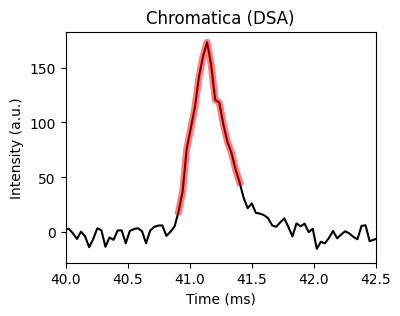

In [31]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import RealData, ODR, Model as ODRModel
from scipy.stats import expon, norm, rice
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import logging

npz = np.load('/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/chromatica.npz')
data = npz['power_2d']

data_bpc = np.zeros_like(data)
for i in range(6144):
    chmean = np.nanmean(data[i, :1000])
    chstd = np.nanstd(data[i, :1000])
    data_bpc[i, :] = data[i,:]-chmean
    data_bpc[i, :] /= chstd
data_bpc = np.nan_to_num(data_bpc, nan=0.0, posinf=0.0, neginf=0.0)

fig = plt.figure(figsize=(4,3))
time = np.linspace(0,data.shape[1]*32.768e-3,data.shape[1])
time_lim = time[1248:1264]
timeseries = np.nansum(data,axis=0)
timeseries_lim = timeseries[1248:1264]
plt.plot(time,timeseries,c='k')
plt.plot(time_lim,timeseries_lim,c='r',alpha=0.5,linewidth=5)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (a.u.)')
plt.xlim(40,42.5)
plt.title('Chromatica (DSA)')
plt.show()

In [28]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import RealData, ODR, Model as ODRModel
from scipy.stats import expon, norm, rice
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import logging
    
def plot_spectrum_and_histograms(freqs, spectrum_on, spectrum_off, num_subbands=4, title="Intensity Distribution Analysis"):
    """
    Creates a multi-panel plot showing spectra and fitted intensity histograms.
    This version fits the decaying tail of the signal histogram for a better visual fit.
    """
    logging.info(f"Generating spectrum and histogram plot: {title}")
    
    # Define the models to fit directly to the histogram data
    def gaussian_func(x, amplitude, mu, sigma):
        return amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2))

    def exponential_func(x, amplitude, scale, loc):
        x_masked = np.copy(x)
        x_masked[x_masked < loc] = loc
        return amplitude * np.exp(-(x_masked - loc) / scale)

    fig, axes = plt.subplots(num_subbands, 2, figsize=(25, 15), width_ratios=[1, 0.2])
    fig.suptitle(title, fontsize=20, y=1.)
    
    chunks = np.linspace(0, len(freqs), num_subbands + 1, dtype=int)

    for i in range(num_subbands):
        lo, hi = chunks[i], chunks[i+1]
        ax_spec = axes[i, 0]
        ax_hist = axes[i, 1]

        # Get data chunks and remove NaNs for robust statistics and fitting
        spec_on_chunk = spectrum_on[lo:hi][np.isfinite(spectrum_on[lo:hi])]
        spec_off_chunk = spectrum_off[lo:hi][np.isfinite(spectrum_off[lo:hi])]
        freq_chunk = freqs[lo:hi]

        # Plot Spectra (Left Column)
        offset = np.std(spec_on_chunk) * 4 if len(spec_on_chunk) > 0 else 1.0
        ax_spec.step(freq_chunk, spectrum_on[lo:hi], color='k', label='On-Pulse (Signal)')
        ax_spec.step(freq_chunk, spectrum_off[lo:hi] - offset, color='m', alpha=0.7, label='Off-Pulse (Noise)')
        ax_spec.axhline(0, linestyle='dotted', color='k', alpha=0.5)
        ax_spec.axhline(-offset, linestyle='dotted', color='m', alpha=0.5)

        ax_spec.set_xlim(freq_chunk.min(), freq_chunk.max())
        spec_min = np.min(spectrum_off[lo:hi] - offset) if len(spec_off_chunk) > 0 else -1
        spec_max = np.max(spectrum_on[lo:hi]) if len(spec_on_chunk) > 0 else 1
        ax_spec.set_ylim(spec_min * 1.1, spec_max * 1.3)
        ax_spec.set_ylabel('Intensity', fontsize=17)
        ax_spec.legend(loc='upper right', frameon=False, fontsize=17)
        #if i < num_subbands - 1:
        #    ax_spec.set_xticklabels([])

        # Plot Histograms and Fits (Right Column)
        counts_on, bin_edges_on, _ = ax_hist.hist(spec_on_chunk, bins=50, histtype='step', color='k', linewidth=2, label='Signal')
        bin_centers_on = (bin_edges_on[:-1] + bin_edges_on[1:]) / 2
        
        counts_off, bin_edges_off, _ = ax_hist.hist(spec_off_chunk, bins=50, histtype='step', color='m', linewidth=2, linestyle='--', label='Noise')
        bin_centers_off = (bin_edges_off[:-1] + bin_edges_off[1:]) / 2
        
        # Create a smooth x-axis for plotting the fit curves
        x_fit_min = np.min(bin_edges_off) if len(bin_edges_off) > 1 else 0
        x_fit_max = np.max(bin_edges_on) if len(bin_edges_on) > 1 else 1
        x_fit = np.linspace(x_fit_min, x_fit_max, 200)

        # Fit Exponential to the TAIL of the Signal Histogram
        if len(spec_on_chunk) > 10:
            try:
                # Find the peak of the histogram to define the start of the tail
                peak_index = np.argmax(counts_on)
                
                # Select data to the right of the peak
                tail_centers = bin_centers_on[peak_index:]
                tail_counts = counts_on[peak_index:]
                
                # Only fit if there are enough points in the tail
                if len(tail_centers) > 3:
                    p0_exp = [tail_counts[0], np.std(spec_on_chunk), tail_centers[0]]
                    popt_exp, _ = curve_fit(exponential_func, tail_centers, tail_counts, p0=p0_exp, maxfev=8000)
                    print(f'Popt: {popt_exp}')
                    ax_hist.plot(x_fit, exponential_func(x_fit, *popt_exp), 'g-.', lw=2, label=f'Exp. Fit (scale={popt_exp[1]:.2f})')
                else:
                    logging.warning(f"Not enough data points in tail to fit exponential for sub-band {i+1}")
            except (RuntimeError, IndexError) as e:
                logging.warning(f"Could not fit exponential to signal in sub-band {i+1}: {e}")

        # Fit Gaussian to Noise Histogram (no change needed here)
        if len(spec_off_chunk) > 10:
            try:
                p0_gauss = [np.max(counts_off), np.mean(spec_off_chunk), np.std(spec_off_chunk)]
                popt_gauss, _ = curve_fit(gaussian_func, bin_centers_off, counts_off, p0=p0_gauss, maxfev=8000)
                ax_hist.plot(x_fit, gaussian_func(x_fit, *popt_gauss), 'r:', lw=3, label=f'Gauss. Fit ($\sigma$={abs(popt_gauss[2]):.2f})')
            except RuntimeError as e:
                logging.warning(f"Could not fit gaussian to noise in sub-band {i+1}: {e}")

        if i < num_subbands - 1:
            ax_hist.set_xticklabels([])
            
        ax_hist.set_yscale('log')
        ax_hist.set_ylim(0.5, max(popt_gauss[0], popt_exp[0])*1.245)
        ax_hist.legend(frameon=False, fontsize=17, bbox_to_anchor=(1.85, 0.5, 0.5, 0.5))

    axes[-1, 0].set_xlabel('Frequency (MHz)', fontsize=17)
    axes[-1, 1].set_xlabel('Intensity (Counts)', fontsize=17)
    
    for ax_row in axes:
        ax_row[1].set_ylabel("Counts")
        ax_row[1].yaxis.set_label_position("right")
        ax_row[1].yaxis.tick_right()
        
    for subax in axes.flatten():
        subax.title.set_fontsize(17)
        subax.xaxis.label.set_fontsize(17)
        subax.yaxis.label.set_fontsize(17)
        subax.tick_params(axis='both', labelsize=17)

    fig.tight_layout() #rect=[0, 0, 1, 0.96])
    plt.show()
    
    
    freqs = np.linspace(1311.25, 1498.75, 6144)
chunks = np.linspace(0, 6144, 5, dtype=int)
print(f'Chunks: {chunks}')

on_0=1248
on_1=1264
spectrum_on = np.nansum(data_bpc[:, on_0:on_1],axis=1)

off_0=1214
off_1=1230
spectrum_off = np.nansum(data_bpc[:, off_0:off_1],axis=1)

plot_spectrum_and_histograms(freqs, spectrum_on, spectrum_off, num_subbands=4, title="Chromatica (DSA)")

#plot_spectrum_and_histograms_rice(freqs, spectrum_on, spectrum_off, num_subbands=4, title="Intensity Distribution Analysis")

INFO: Generating spectrum and histogram plot: Chromatica (DSA)


Chunks: [   0 1536 3072 4608 6144]
Popt: [116.49999989   6.31985042   2.19499864]
Popt: [120.0000006    6.99813061   2.71545799]
Popt: [130.000002     8.00738094   1.16760287]
Popt: [128.18060647   7.9201878    5.33679914]


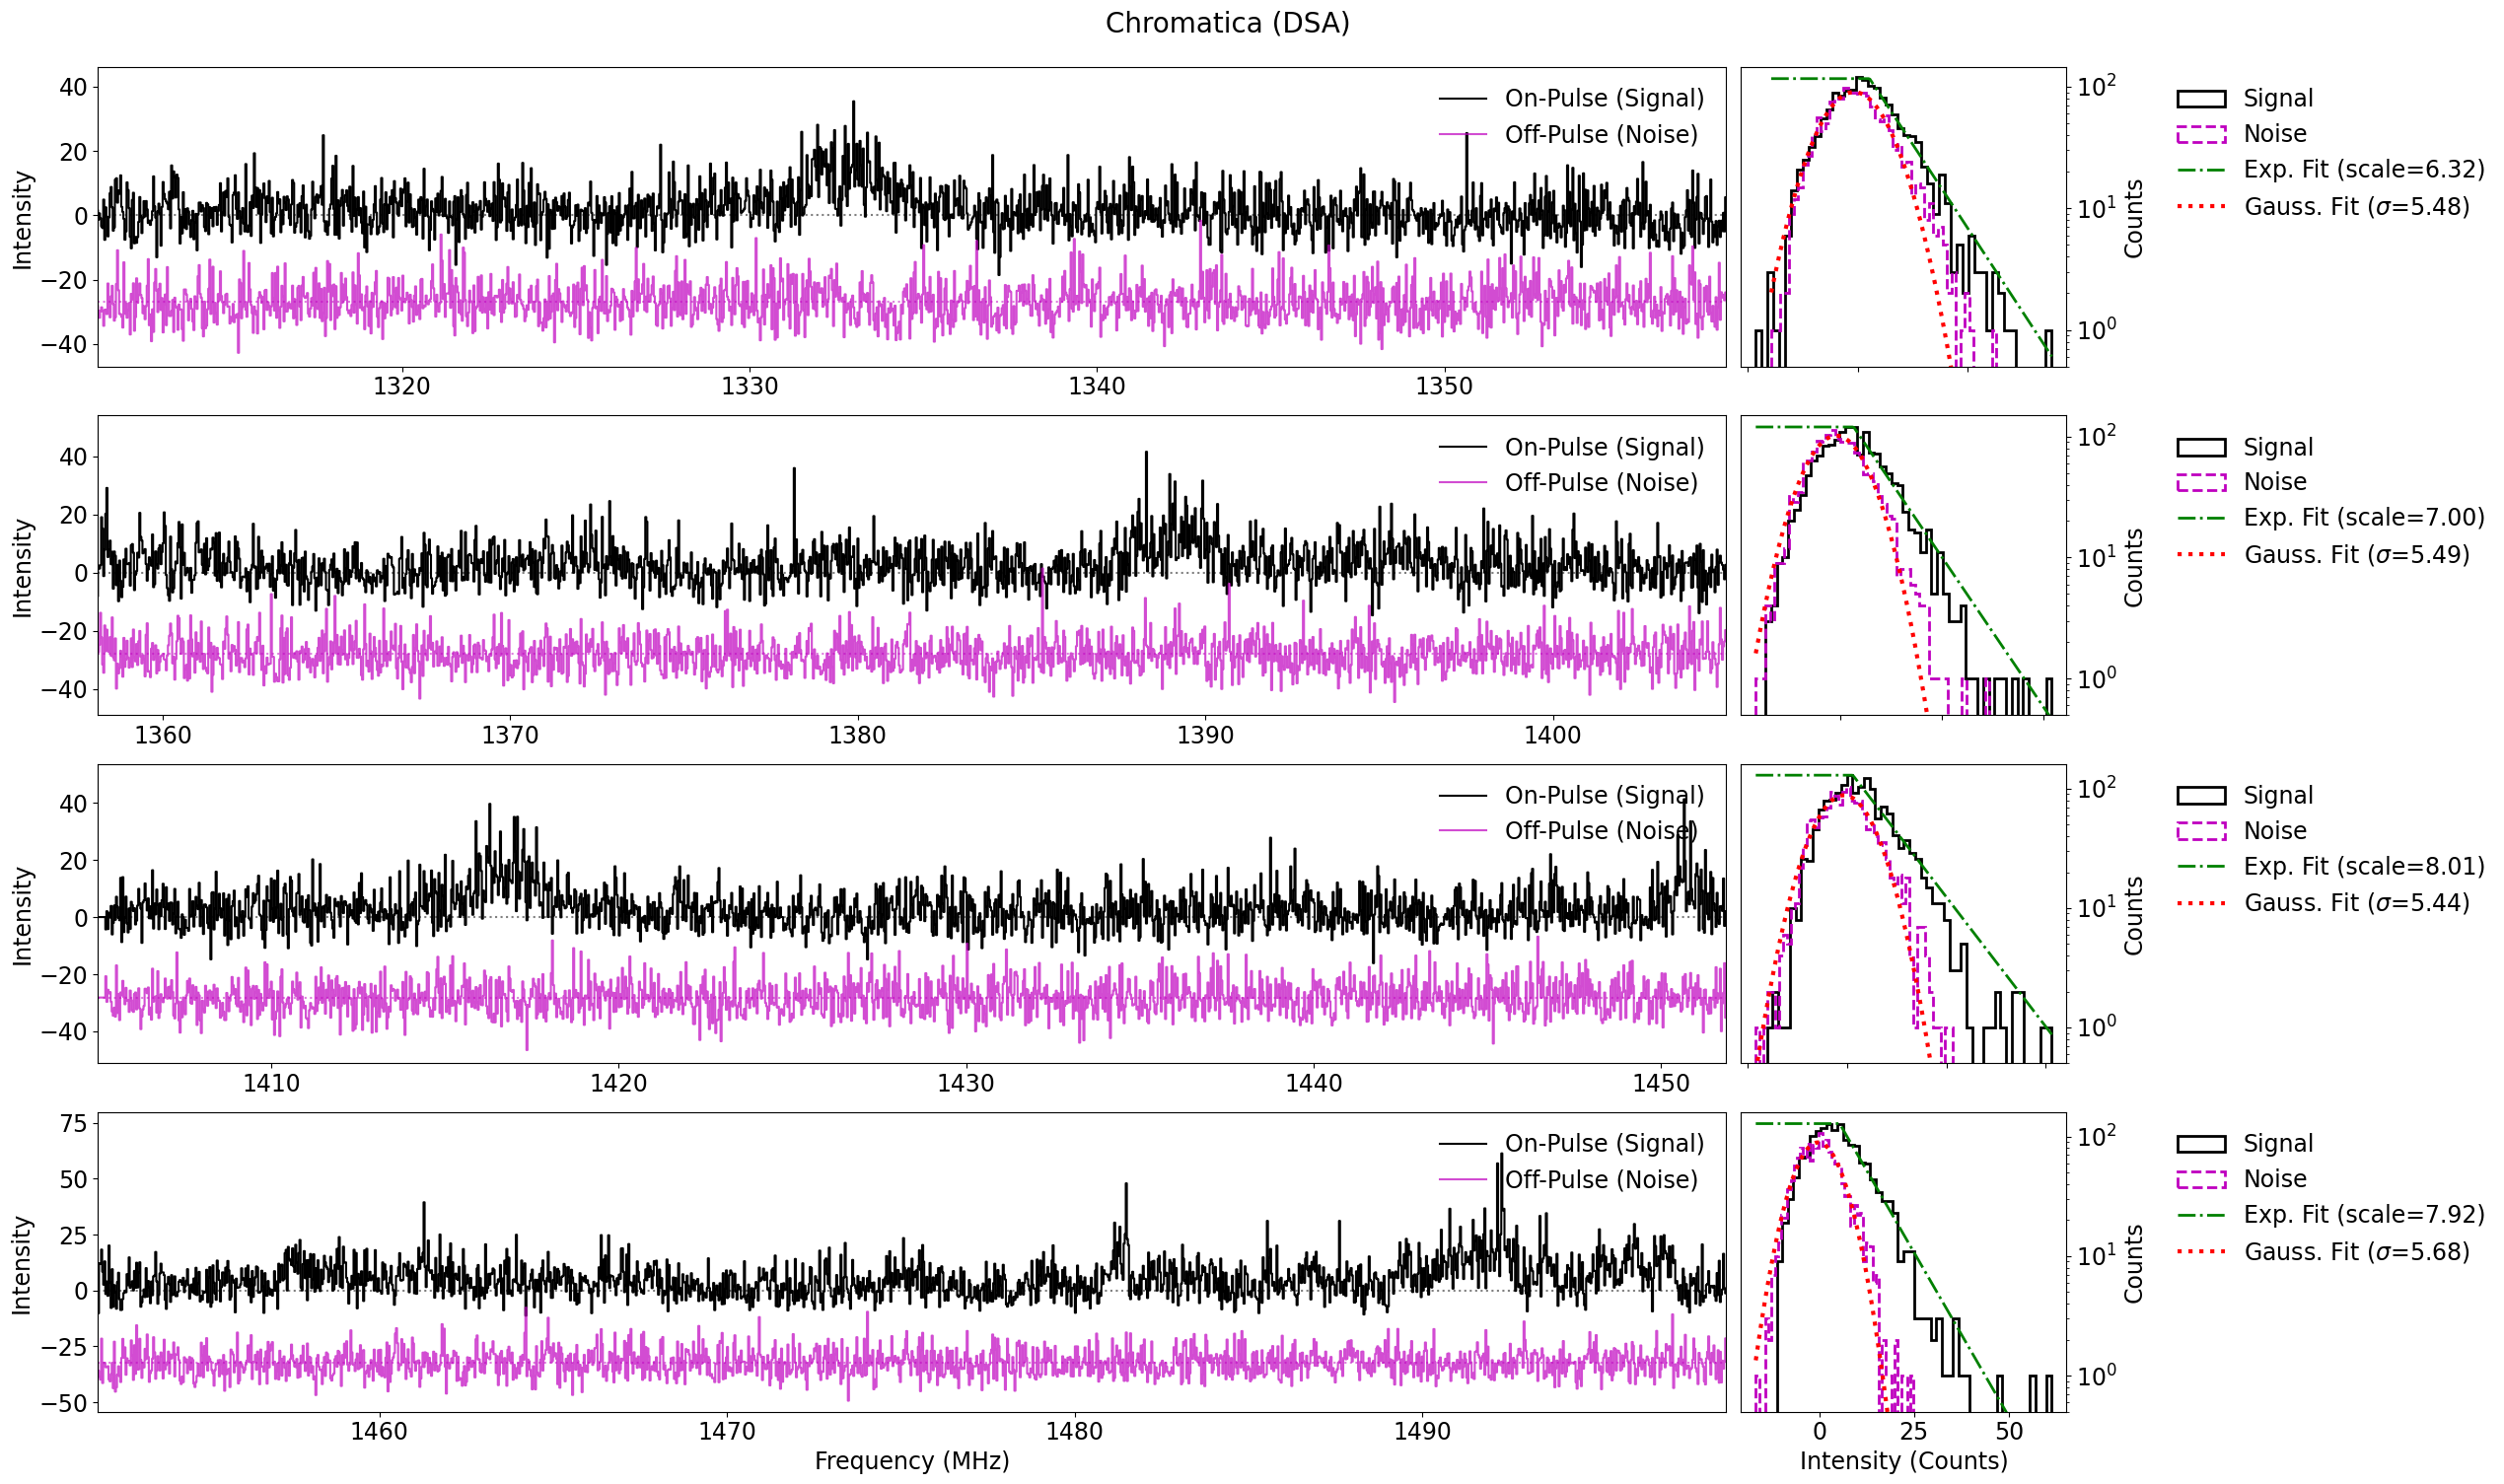

In [89]:
# Set path for module imports
import sys, os
# replace the path below with the absolute path to your `scattering/` folder
pkg_root = "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation"
sys.path.insert(0, pkg_root)

%load_ext autoreload
%autoreload 2

import logging
import json
import importlib
import numpy as np

import matplotlib.pyplot as plt

# Import all modules from our new package

from scint_analysis import config
from scint_analysis import core
from scint_analysis import analysis
from scint_analysis import plotting
from scint_analysis import noise

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


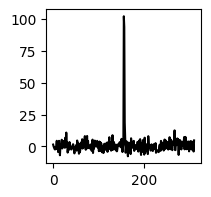

INFO: Loading burst configuration from: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/chromatica.yaml
ERROR: Burst config file not found: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/chromatica.yaml
ERROR: Failed to load configuration: [Errno 2] No such file or directory: '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/chromatica.yaml'
INFO: Loading DynamicSpectrum from file: /arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/dsa110-scat/scintillation/scint_analysis/data/chromatica.npz
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Generating dynamic spectrum plot.


Raw spectrum loaded successfully.
<DynamicSpectrum (6144 channels x 2500 timesteps, 1311.2-1498.8 MHz)>

Displaying raw dynamic spectrum...


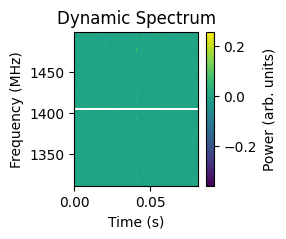

INFO: Applying RFI masking.
INFO: Using time downsampling factor of 16 for RFI statistical checks.
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1271.
INFO: Using symmetric noise window of duration 23 bins.
INFO: Using downsampled noise statistics from bins 76 to 78.



Applying RFI masking...


Iterative RFI Masking in Frequency Domain:  20%|██        | 1/5 [00:00<00:00, 95.87it/s]
INFO: Masked 4 channels based on frequency-domain stats.
INFO: Skipping time-domain RFI flagging as per configuration.
INFO: Initializing DynamicSpectrum object.
INFO: Spectrum shape: (6144, 2500)
INFO: Generating dynamic spectrum plot.


RFI masking complete.

Displaying RFI-masked dynamic spectrum...


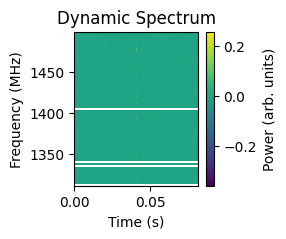

INFO: Starting sub-band ACF calculations.
INFO: Finding full signal envelope with S/N threshold > 5.0 (downsample ×8).
INFO: Full signal envelope found between bins 1248 and 1271.



Calculating ACFs for all sub-bands (this may take a moment)...


Calculating sub-band ACFs: 100%|██████████| 4/4 [00:00<00:00, 45.73it/s]
INFO: Fitting all ACF models to all sub-band ACFs...


ACF calculation complete.

ACF Results Dictionary Keys: dict_keys(['subband_acfs', 'subband_lags_mhz', 'subband_center_freqs_mhz', 'subband_channel_widths_mhz', 'subband_num_channels'])
Computed ACFs for 4 sub-bands.

Fitting models and deriving final scintillation parameters...


/opt/pysetup/.venv/lib/python3.8/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
INFO: --- Model Comparison (Lowest Total BIC is Best) ---
INFO: Model 'fit_1c_lor': Total BIC = -15596.96 (from 4 fits)
INFO: Model 'fit_2c_lor': Total BIC = -15823.69 (from 4 fits)
INFO: Model 'fit_1c_gauss': Total BIC = -15614.35 (from 4 fits)
INFO: Model 'fit_2c_gauss': Total BIC = -15969.15 (from 4 fits)
INFO: ==> Best overall model selected: fit_2c_gauss
INFO: Generating full analysis overview plot.


Analysis complete.

--- Final Derived Parameters ---
{
  "best_model": "fit_2c_gauss",
  "components": {
    "component_1": {
      "power_law_fit_report": [
        1.2424166370458382e-15,
        4.656596743308591
      ],
      "scaling_index": 4.656596743308591,
      "scaling_index_err": 19.389891332427776,
      "bw_at_ref_mhz": 0.5552861268834482,
      "bw_at_ref_mhz_err": 0.5027122692995908,
      "subband_measurements": [
        {
          "freq_mhz": 1321.2766563568289,
          "bw": 0.2166188597177501,
          "mod": 0.5799089118204033,
          "bw_err": 0.05011815789291532,
          "finite_err": 0.01125696560810462
        },
        {
          "freq_mhz": 1351.8907699820936,
          "bw": 0.7116981035811853,
          "mod": 0.7130434710031897,
          "bw_err": 0.053624932548932684,
          "finite_err": 0.04683610909245623
        },
        {
          "freq_mhz": 1396.6062998534917,
          "bw": 0.912487430812929,
          "mod": 0.718646542814878

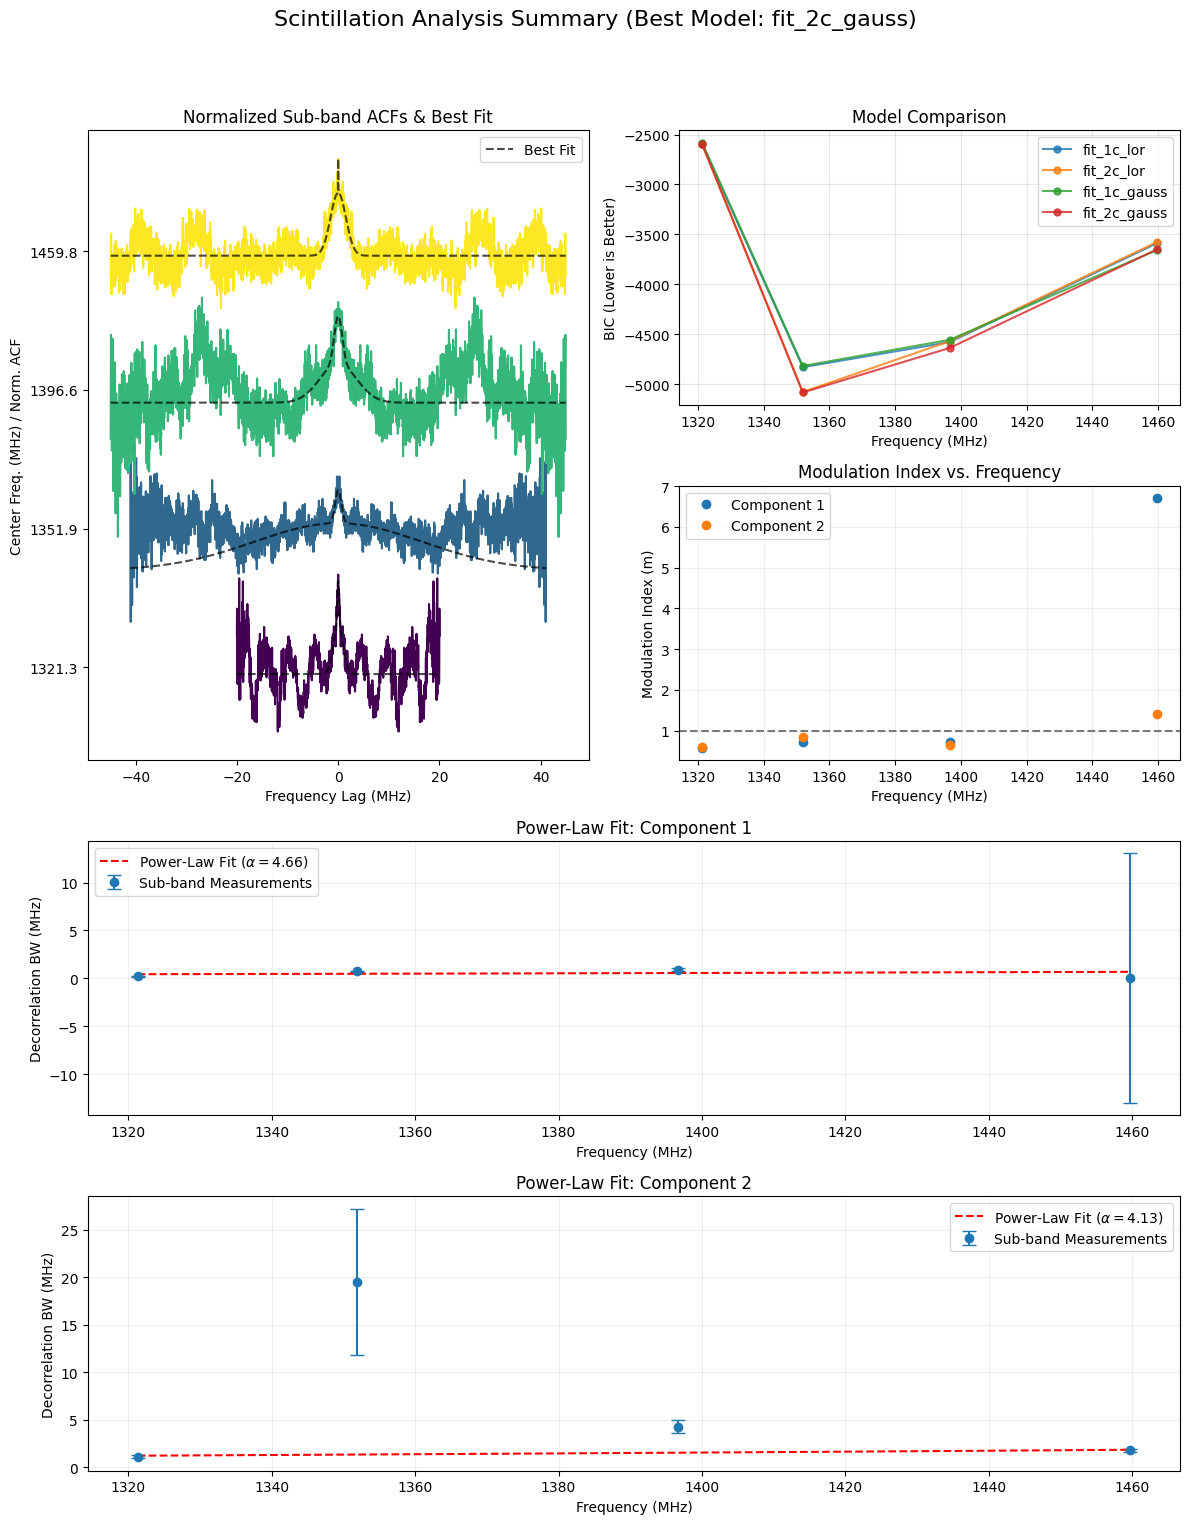

In [90]:
# --- Configuration ---
# Set up basic logging to see pipeline output in the notebook
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Define the path to the configuration file for the analysis run
BURST_CONFIG_PATH = '/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/configs/bursts/chromatica.yaml'

casey = np.load('/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/data/chromatica_dsa_I_272_368_2500b_cntr_bpc.npy')
downsample_factor = 8
prof = np.nansum(casey,axis=0)
n = prof.size - (prof.size % downsample_factor)
prof = prof[:n].reshape(-1, downsample_factor).mean(axis=1)
    
fig = plt.figure(figsize = (2, 2))
plt.plot(prof, c ='k')
plt.show()

# Load the merged configuration from the YAML files
try:
    analysis_config = config.load_config(BURST_CONFIG_PATH)
    # Pretty-print the configuration to verify it
    print("--- Loaded Configuration ---")
    print(json.dumps(analysis_config, indent=2))
except Exception as e:
    logging.error(f"Failed to load configuration: {e}")

# Load the dynamic spectrum from the path specified in the config
try:
    raw_spectrum = core.DynamicSpectrum.from_numpy_file(analysis_config['input_data_path'])
    print("Raw spectrum loaded successfully.")
    print(raw_spectrum)
except Exception as e:
    logging.error(f"Failed to load data: {e}")

# --- Visualization Step 1: Inspect Raw Data ---
if 'raw_spectrum' in locals():
    print("\nDisplaying raw dynamic spectrum...")
    plotting.plot_dynamic_spectrum(raw_spectrum, figsize=(2, 2))

# --- Perform RFI Masking ---
if 'raw_spectrum' in locals():
    print("\nApplying RFI masking...")
    masked_spectrum = raw_spectrum.mask_rfi(analysis_config)
    print("RFI masking complete.")

    # --- Visualization Step 2: Inspect Masked Data ---
    print("\nDisplaying RFI-masked dynamic spectrum...")
    plotting.plot_dynamic_spectrum(masked_spectrum, figsize=(2, 2))

# --- Calculate ACFs for all sub-bands ---
if 'masked_spectrum' in locals():
    print("\nCalculating ACFs for all sub-bands (this may take a moment)...")
    acf_results = analysis.calculate_acfs_for_subbands(masked_spectrum, analysis_config)
    print("ACF calculation complete.")
    
    # You can inspect the structure of the results
    print("\nACF Results Dictionary Keys:", acf_results.keys())
    print(f"Computed ACFs for {len(acf_results['subband_acfs'])} sub-bands.")
    
# --- Run the final analysis and fitting stage ---
if 'acf_results' in locals() and acf_results['subband_acfs']:
    print("\nFitting models and deriving final scintillation parameters...")
    # This function returns both the final parameters and the raw lmfit objects
    final_results, all_subband_fits, powlaw_fit_params = analysis.analyze_scintillation_from_acfs(acf_results, analysis_config)
    print("Analysis complete.")

    # --- Inspect the Final Results ---
    print("\n--- Final Derived Parameters ---")
    print(json.dumps(final_results, indent=2))
else:
    logging.error("ACF results not available. Cannot proceed to final analysis.")
    
# --- Generate the final overview plot ---
if 'final_results' in locals() and 'all_subband_fits' in locals():
    print("\nGenerating final analysis overview plot...")
    plotting.plot_analysis_overview(
        filename='../casey_dsa_scint.pdf',
        analysis_results=final_results,
        acf_results=acf_results,
        all_subband_fits=all_subband_fits,
        powlaw_fit_params=powlaw_fit_params
    )
else:
    logging.warning("Final results not available, skipping overview plot.")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation/scint_analysis/noise.py:145: UserWarning: NaNs detected – in‑painting with row/col medians.
  warnings.warn("NaNs detected – in‑painting with row/col medians.")


Descriptor OK – nan‑safe.  Fake spectrum mean: 0.9932773


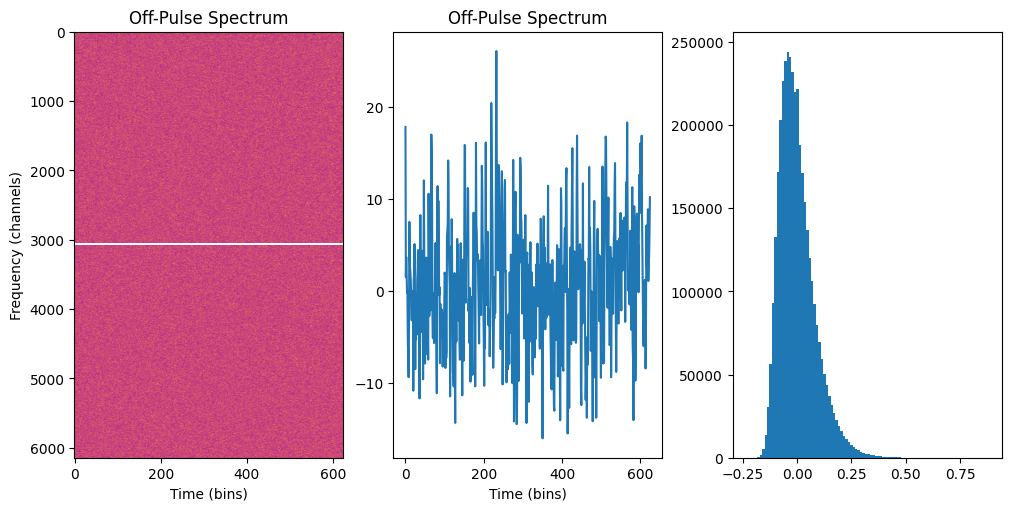

Nan check: (array([], dtype=int64), array([], dtype=int64))


/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


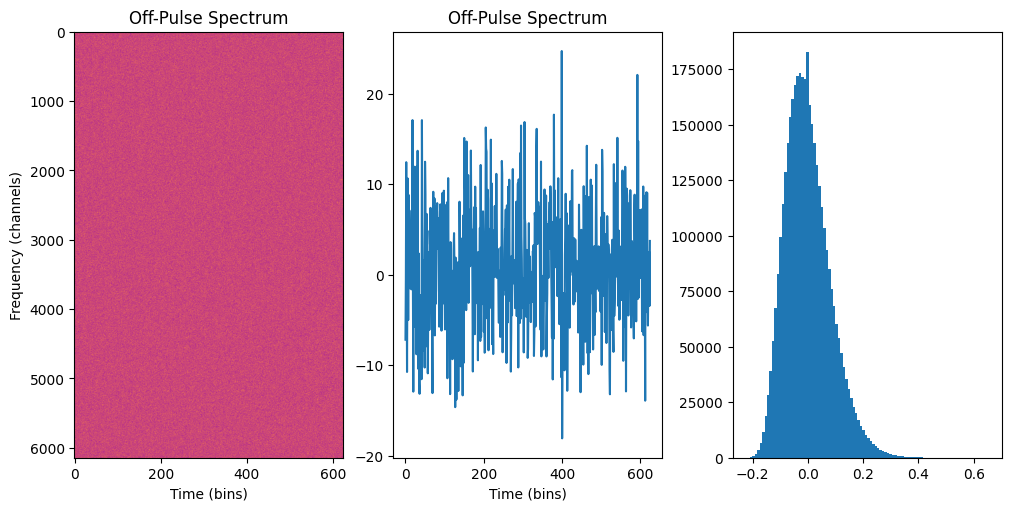

In [91]:
# Set path for module imports
import sys, os
# replace the path below with the absolute path to your `scattering/` folder
pkg_root = "/arc/home/jfaber/baseband_morphologies/chime_dsa_codetections/FLITS/scintillation"
sys.path.insert(0, pkg_root)

%load_ext autoreload
%autoreload 2

from scint_analysis.noise import NoiseDescriptor, estimate_noise_descriptor

rng = np.random.default_rng(0)
I_syn = rng.exponential(scale=1.0, size=(2048, 64)).astype(np.float32)
# Inject NaNs to test robustness
I_syn[100:110, 10:20] = np.nan
desc = estimate_noise_descriptor(I_syn)
fake = desc.sample(seed=1)
print("Descriptor OK – nan‑safe.  Fake spectrum mean:", fake.mean())

#################################################################################
#################################################################################

power = raw_spectrum.power
off_pulse = power[:, :power.shape[1]//4]

fig, axes = plt.subplots(1, 3, figsize=(10, 5), constrained_layout=True)
ax = axes.ravel()
mean=np.nanmean(off_pulse)
std=np.nanstd(off_pulse)
ax[0].imshow(off_pulse, aspect='auto', cmap='plasma', vmin=mean-3*std, vmax=mean+3*std)
ax[0].set_title('Off-Pulse Spectrum')
ax[0].set_xlabel('Time (bins)')
ax[0].set_ylabel('Frequency (channels)')

ax[1].plot(np.nansum(off_pulse,axis=0))
ax[1].set_title('Off-Pulse Spectrum')
ax[1].set_xlabel('Time (bins)')

ax[2].hist(off_pulse.flatten(), bins=100)

plt.show()

print(f'Nan check: {np.where(off_pulse == np.nan)}')
desc = estimate_noise_descriptor(off_pulse)
off_pulse_fake = desc.sample(seed=123)

fig, axes = plt.subplots(1, 3, figsize=(10, 5), constrained_layout=True)

ax = axes.ravel()
mean_fake=np.nanmean(off_pulse_fake)
std_fake=np.nanstd(off_pulse_fake)
ax[0].imshow(off_pulse_fake, aspect='auto', cmap='plasma', vmin=mean_fake-3*std_fake, vmax=mean_fake+3*std_fake)
ax[0].set_title('Off-Pulse Spectrum')
ax[0].set_xlabel('Time (bins)')
ax[0].set_ylabel('Frequency (channels)')

ax[1].plot(np.nansum(off_pulse_fake,axis=0))
ax[1].set_title('Off-Pulse Spectrum')
ax[1].set_xlabel('Time (bins)')

ax[2].hist(off_pulse_fake.flatten(), bins=100)

plt.show()



In [75]:
print(off_pulse.min(), off_pulse.max(), off_pulse.mean())
print(off_pulse_fake.min(), off_pulse_fake.max(), off_pulse_fake.mean())

-0.24012995953556518 0.8857529960977865 0.0001013889272447105
0.0 1.0263812e-14 3.3833236e-21


In [83]:
print(off_pulse_fake)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


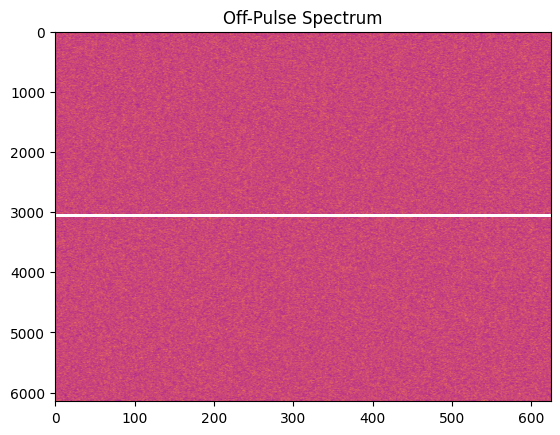

In [17]:
# Generate fake noise

#rng = np.random.default_rng(0)
#I = rng.exponential(scale=1.0, size=(2048, 64)).astype(np.float32)
#
#fig=plt.figure()
#plt.hist(I.flatten(), bins=100)
#plt.title('Noise Histogram')
#plt.show()
#
#fig=plt.figure()
#mean=np.nanmean(I)
#std=np.nanstd(I)
#plt.imshow(I, aspect='auto', cmap='plasma', vmin=mean-3*std, vmax=mean+3*std)
#plt.title('Noise Spectrum')
#plt.show()
#
#desc = estimate_noise_descriptor(I)
#print("Recovered descriptor:\n", desc)
#
#fake = desc.sample(seed=1)
#print("Fake spectrum shape:", fake.shape)
#
#fig=plt.figure()
#mean=np.nanmean(fake)
#std=np.nanstd(fake)
#plt.imshow(fake, aspect='auto', cmap='plasma', vmin=mean-3*std, vmax=mean+3*std)
#plt.title('Fake Noise Spectrum')
#plt.show()




In [6]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting

# --- Run the final analysis and fitting stage ---
if 'acf_results' in locals() and acf_results['subband_acfs']:
    print("\nFitting models and deriving final scintillation parameters...")
    # This function returns both the final parameters and the raw lmfit objects
    final_results, all_subband_fits, powlaw_fit_params = analysis.analyze_scintillation_from_acfs(acf_results, analysis_config)
    print("Analysis complete.")

    # --- Inspect the Final Results ---
    print("\n--- Final Derived Parameters ---")
    print(json.dumps(final_results, indent=2))
else:
    logging.error("ACF results not available. Cannot proceed to final analysis.")


INFO: Fitting Lorentzian models to all sub-band ACFs...
/opt/pysetup/.venv/lib/python3.8/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")



Fitting models and deriving final scintillation parameters...


INFO: Model selection complete. Best overall model: 1 component(s).


Analysis complete.

--- Final Derived Parameters ---
{
  "best_model": 1,
  "components": {
    "scint_scale": {
      "power_law_fit_report": [
        2.010124792228405e-09,
        2.8364871387202912
      ],
      "scaling_index": 2.8364871387202912,
      "scaling_index_err": 19.183037981321714,
      "bw_at_ref_mhz": 1.6872317140451365,
      "bw_at_ref_mhz_err": 0.8493381502928066,
      "subband_measurements": [
        {
          "freq_mhz": 1324.4815236854959,
          "bw": 2.302610996664314,
          "mod": 0.3977613801984734,
          "bw_err": 0.12556720679626796,
          "finite_err": 0.33941468231261723
        },
        {
          "freq_mhz": 1365.2901676705194,
          "bw": 12.721848432969393,
          "mod": 1.140616544032408,
          "bw_err": 0.0768978557125016,
          "finite_err": 3.055808106466236
        },
        {
          "freq_mhz": 1410.829806283575,
          "bw": 1.348577332124393,
          "mod": 0.24526926969015905,
          "bw_e

INFO: Generating full analysis overview plot.



Generating final analysis overview plot...


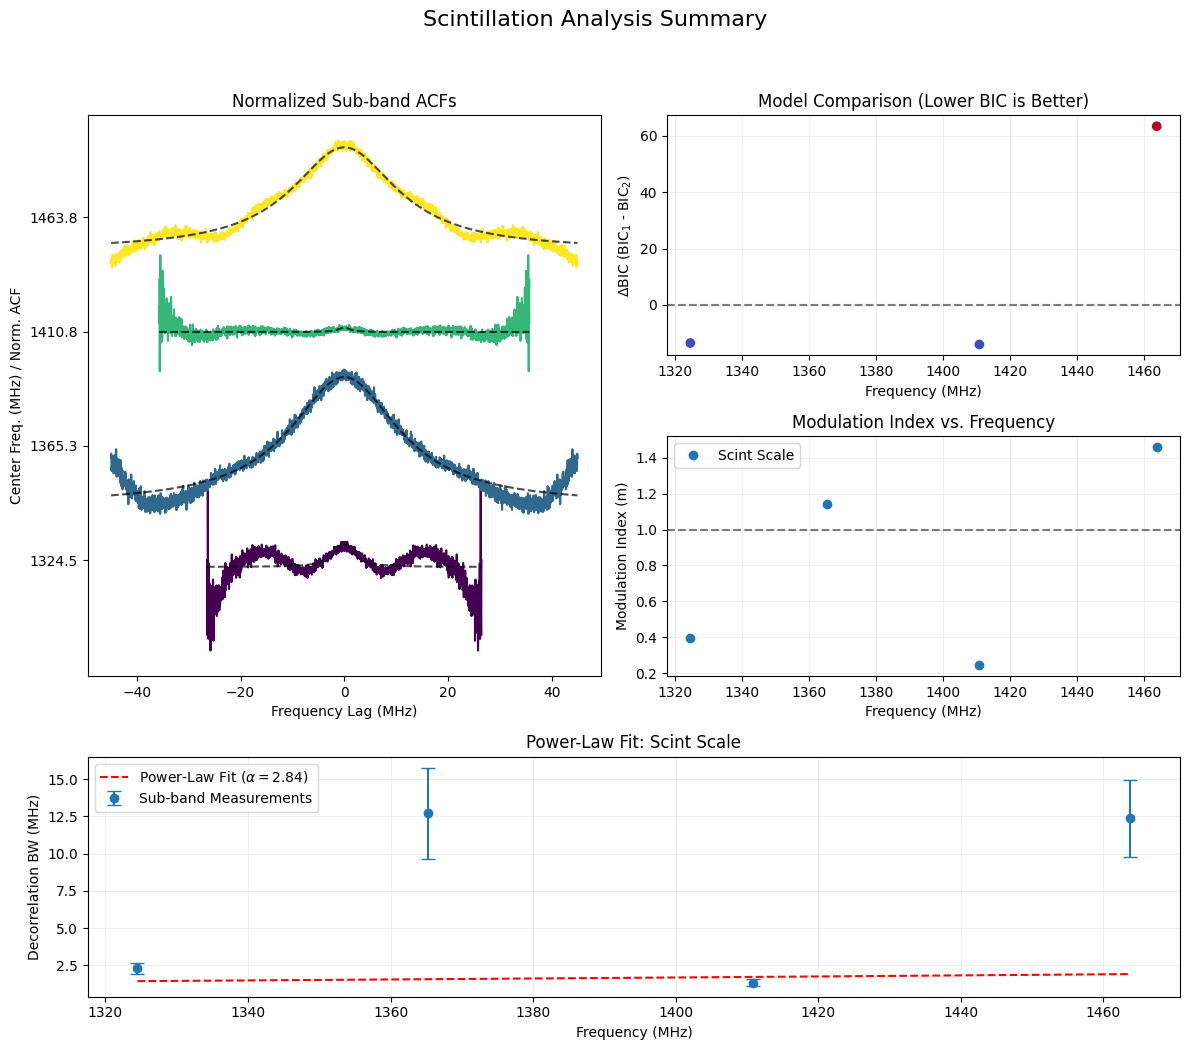

In [11]:
# Import all modules from our new package
import scint_analysis
importlib.reload(scint_analysis)
from scint_analysis import config, core, analysis, plotting
importlib.reload(config)
importlib.reload(core)
importlib.reload(analysis)
importlib.reload(plotting)

# --- Generate the final overview plot ---
if 'final_results' in locals() and 'all_subband_fits' in locals():
    print("\nGenerating final analysis overview plot...")
    plotting.plot_analysis_overview(
        analysis_results=final_results,
        acf_results=acf_results,
        all_subband_fits=all_subband_fits,
        powlaw_fit_params=powlaw_fit_params
    )
else:
    logging.warning("Final results not available, skipping overview plot.")
